In [1]:
import pandas as pd
from sklearn.linear_model import LassoCV
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\hp.csv",encoding='latin1')

In [3]:
df = df.assign(Location='Uttara')

In [4]:
df["View"]= df["View"].str.lower()
df["View"]= df["View"].replace("nortg", "north") 
df["View"]= df["View"].replace("nort", "north") 
df.groupby('View')['View'].agg('count') 
df1 = df.drop('View',axis='columns')
df2 = df1.drop('Pet Policy',axis='columns')

In [5]:
df2['Tiles'] = df2['Tiles'].apply(lambda x: 0 if x=='No' else 1)
df2['Balcony_or_Terrace'] = df2['Balcony_or_Terrace'].apply(lambda x: 0 if x=='No' else 1)
df2['Lobby_in_Building'] = df2['Lobby_in_Building'].apply(lambda x: 0 if x=='No' else 1)
df2['Intercom'] = df2['Intercom'].apply(lambda x: 0 if x=='No' else 1)
df2['CCTV_Security'] = df2['CCTV_Security'].apply(lambda x: 0 if x=='No' else 1)
df2['Maintenance_Staff'] = df2['Maintenance_Staff'].apply(lambda x: 0 if x=='No' else 1)
df2['CleaningServices'] = df2['CleaningServices'].apply(lambda x: 0 if x=='No' else 1)
df2['ElectricityBackup'] = df2['ElectricityBackup'].apply(lambda x: 0 if x=='No' else 1)

In [6]:
df2.head()
df2['Intercom'] = df2.Intercom.astype(int)
df2['CCTV_Security'] = df2.CCTV_Security.astype(int)
df2['Maintenance_Staff'] = df2.Maintenance_Staff.astype(int)
df2['CleaningServices'] = df2.CleaningServices.astype(int)
df2['Tiles'] = df2.Tiles.astype(int)
df2['Balcony_or_Terrace'] = df2.Balcony_or_Terrace.astype(int)
df2['Lobby_in_Building'] = df2.Lobby_in_Building.astype(int)
df2['ElectricityBackup'] = df2.ElectricityBackup.astype(int)

In [7]:
df2['Price'] = (df2['Price'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
df2['Area'] = (df2['Area'].str.split()).apply(lambda x: int(x[0].replace(',', '')))

In [8]:
dummies = pd.get_dummies(df2.Location)
dummies.head(100)

,Uttara
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,1
98,1


In [13]:
df3 = pd.concat([df2,dummies],axis='columns')
df3.head()

,Property Type,Bed,Bath,Area,Location,Price,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Maintenance_Staff,CleaningServices,Tiles,Uttara
0,Apartment,2,2,775,Uttara,3800000.0,1,1,1,1,1,1,1,1,1
1,Apartment,2,2,765,Uttara,3978000.0,1,1,1,1,0,1,1,0,1
2,Apartment,2,2,772,Uttara,4000000.0,1,0,1,0,0,1,1,1,1
3,Apartment,2,2,1008,Uttara,4200000.0,1,0,1,1,0,1,1,1,1
4,Apartment,2,2,1005,Uttara,4200000.0,1,1,1,1,0,1,1,1,1


In [14]:
df3.head()

,Property Type,Bed,Bath,Area,Location,Price,Balcony_or_Terrace,Lobby_in_Building,ElectricityBackup,Intercom,CCTV_Security,Maintenance_Staff,CleaningServices,Tiles,Uttara
0,Apartment,2,2,775,Uttara,3800000.0,1,1,1,1,1,1,1,1,1
1,Apartment,2,2,765,Uttara,3978000.0,1,1,1,1,0,1,1,0,1
2,Apartment,2,2,772,Uttara,4000000.0,1,0,1,0,0,1,1,1,1
3,Apartment,2,2,1008,Uttara,4200000.0,1,0,1,1,0,1,1,1,1
4,Apartment,2,2,1005,Uttara,4200000.0,1,1,1,1,0,1,1,1,1


In [15]:
df4 = df3.drop('Location',axis='columns')
df42 = df3.drop('Balcony_or_Terrace',axis='columns')
df43 = df42.drop('Lobby_in_Building',axis='columns')
df44 = df43.drop('ElectricityBackup',axis='columns')
df45 = df44.drop('Intercom',axis='columns')
df46 = df45.drop('CCTV_Security',axis='columns')
df47 = df46.drop('Maintenance_Staff',axis='columns')
df48 = df47.drop('CleaningServices',axis='columns')
df49 = df48.drop('Tiles',axis='columns')
df50 = df49.drop('Location',axis='columns')
df5 = df50.drop('Property Type',axis='columns')
df5.head(2)

,Bed,Bath,Area,Price,Uttara
0,2,2,775,3800000.0,1
1,2,2,765,3978000.0,1


In [16]:
X = df5.drop(['Price'],axis='columns')
x = X.drop(['Uttara'],axis='columns')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
Bed       136 non-null int64
Bath      136 non-null int64
Area      136 non-null int64
Uttara    136 non-null uint8
dtypes: int64(3), uint8(1)
memory usage: 3.4 KB


In [17]:
X.head()

,Bed,Bath,Area,Uttara
0,2,2,775,1
1,2,2,765,1
2,2,2,772,1
3,2,2,1008,1
4,2,2,1005,1


In [18]:
y = df5.Price
y.head()

0    3800000.0
1    3978000.0
2    4000000.0
3    4200000.0
4    4200000.0
Name: Price, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=82)

In [20]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7540804447524448

In [21]:
print(lr_clf.coef_)

[511429.80568461 103571.57267512   2800.87225552      0.        ]


In [22]:
def predict_price(Bed,Bath,Area,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Bed
    x[1] = Bath
    x[2] = Area
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [23]:
predict_price(2,2,770,'Uttara')

5028493.075676716

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 0.4178941 ,  0.59445541, -0.00673363,  0.39409527,  0.31543358])

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.343029,{'normalize': True}
1,lasso,0.343030,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.006328,"{'criterion': 'mse', 'splitter': 'random'}"


In [26]:
X.columns

Index(['Bed', 'Bath', 'Area', 'Uttara'], dtype='object')

In [27]:
np.where(X.columns=="Uttara")[0][0]

3

In [28]:
def predict_price(Bed,Bath,Area,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Bed
    x[1] = Bath
    x[2] = Area
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [29]:
df5.head()

,Bed,Bath,Area,Price,Uttara
0,2,2,775,3800000.0,1
1,2,2,765,3978000.0,1
2,2,2,772,4000000.0,1
3,2,2,1008,4200000.0,1
4,2,2,1005,4200000.0,1


In [30]:
predict_price(2,2,775,'Uttara')

5042497.436954299

In [31]:
lr_clf.predict([[2,2,775,1]])

array([5042497.4369543])

In [32]:
print(lr_clf.coef_)

[511429.80568461 103571.57267512   2800.87225552      0.        ]


In [33]:
lr_clf.predict([[2,2,775,1]])

array([5042497.4369543])

In [34]:
lr_clf.predict([[1,1,1,1]])

array([2259620.93282474])

In [35]:
print(511429*2+103571*2+2800*775)

3400000


In [36]:
coeff_df = pd.DataFrame(lr_clf.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Bed,511429.805685
Bath,103571.572675
Area,2800.872256
Uttara,0.000000


In [37]:
y_pred = lr_clf.predict(X_test)

In [38]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

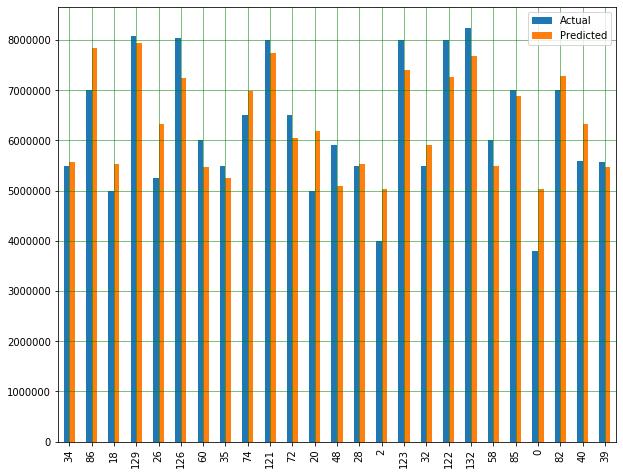

In [39]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [40]:
import pickle
with open('Uttara_House_Price_Prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [41]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [202]:
lr_clf.intercept_

1641818.6822094899